<a href="https://colab.research.google.com/github/danijaved17/saas-churn-prediction/blob/main/Saas_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()

Saving saas_churn.csv to saas_churn (1).csv


In [19]:
import pandas as pd

#load the dataset

df = pd.read_csv("saas_churn.csv")

#preview

df.head()

,user_id,subscription_type,monthly_usage_hours,last_login_days,support_tickets_opened,used_key_feature,churned
0,UID1,Basic,31.8,0,6,No,0
1,UID2,Enterprise,16.6,56,2,Yes,0
2,UID3,Pro,33.8,28,1,Yes,0
3,UID4,Pro,36.1,44,2,No,0
4,UID5,Basic,35.6,48,1,Yes,0


In [20]:
#check for missing values

print (df.isnull().sum())

#Check data types
df.dtypes

user_id                   0
subscription_type         0
monthly_usage_hours       0
last_login_days           0
support_tickets_opened    0
used_key_feature          0
churned                   0
dtype: int64


,0
user_id,object
subscription_type,object
monthly_usage_hours,float64
last_login_days,int64
support_tickets_opened,int64
used_key_feature,object
churned,int64


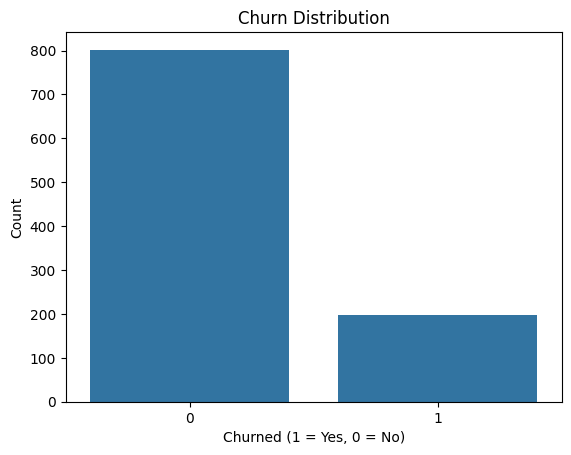

Churn rate:
 churned
0    80.2
1    19.8
Name: proportion, dtype: float64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churned', data=df)
plt.title('Churn Distribution')
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

#Percentage
churn_pct = df['churned'].value_counts(normalize=True) * 100
print("Churn rate:\n", churn_pct)

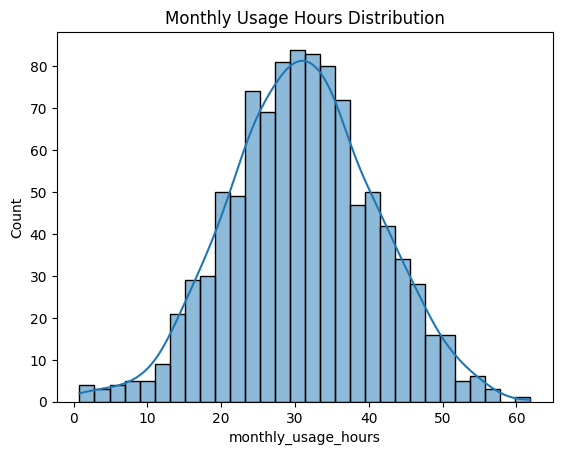

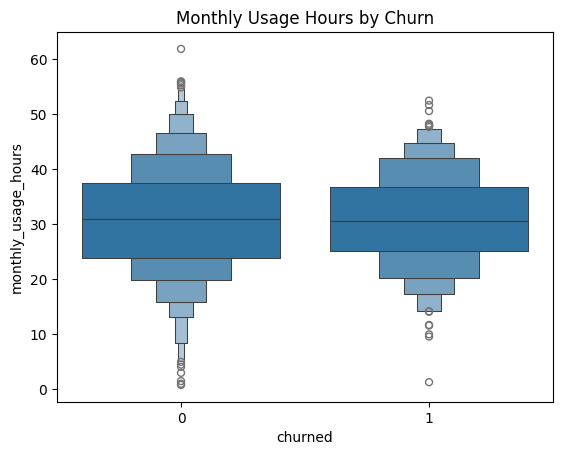

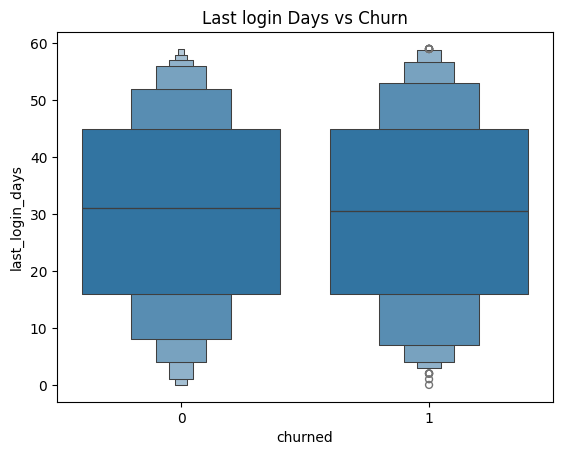

In [22]:
sns.histplot(df['monthly_usage_hours'], bins=30, kde =True)
plt.title('Monthly Usage Hours Distribution')
plt.show()

sns.boxenplot(x='churned', y='monthly_usage_hours', data=df)
plt.title('Monthly Usage Hours by Churn')
plt.show()


sns.boxenplot(x='churned', y='last_login_days', data=df)
plt.title('Last login Days vs Churn')
plt.show()



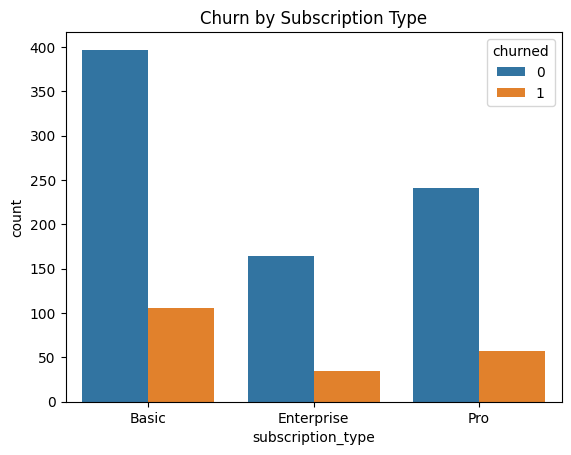

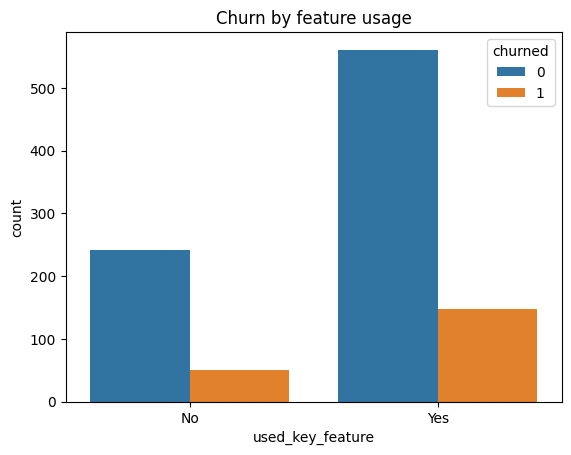

In [23]:
sns.countplot(x='subscription_type', hue='churned', data=df)
plt.title("Churn by Subscription Type")
plt.show()

sns.countplot(x= 'used_key_feature',hue='churned', data=df)
plt.title("Churn by feature usage")
plt.show()

In [24]:
import pandas as pd

# Re-load dataset if necessary
df = pd.read_csv("saas_churn.csv")

# One-hot encode 'subscription_type'
df_encoded = pd.get_dummies(df, columns=['subscription_type'], drop_first=True)

# Binary encode 'used_key_feature'
df_encoded['used_key_feature'] = df_encoded['used_key_feature'].map({'Yes': 1, 'No': 0})

# Drop 'user_id'
df_encoded = df_encoded.drop(columns=['user_id'])


In [25]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('churned', axis=1)
y = df_encoded['churned']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.79

Confusion Matrix:
 [[158   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a balanced random forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.745

Confusion Matrix:
 [[147  11]
 [ 40   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       158
           1       0.15      0.05      0.07        42

    accuracy                           0.74       200
   macro avg       0.47      0.49      0.46       200
weighted avg       0.65      0.74      0.69       200



In [29]:
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
0,monthly_usage_hours,0.446479
1,last_login_days,0.357426
2,support_tickets_opened,0.119020
3,used_key_feature,0.028301
5,subscription_type_Pro,0.025527
4,subscription_type_Enterprise,0.023247


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='index', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Importance', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)